In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
import cv2

In [4]:
tf.executing_eagerly() #check tensorflow version

print(tf.__version__)
print(dir(tf.feature_column))

2.3.0
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'bucketized_column', 'categorical_column_with_hash_bucket', 'categorical_column_with_identity', 'categorical_column_with_vocabulary_file', 'categorical_column_with_vocabulary_list', 'crossed_column', 'embedding_column', 'indicator_column', 'make_parse_example_spec', 'numeric_column', 'sequence_categorical_column_with_hash_bucket', 'sequence_categorical_column_with_identity', 'sequence_categorical_column_with_vocabulary_file', 'sequence_categorical_column_with_vocabulary_list', 'sequence_numeric_column', 'shared_embeddings', 'weighted_categorical_column']


In [50]:
directory = r'C:\Users\User\CE888\Training\Training' #set directory to where datsets are saved

In [51]:
#load training images. Returns tf.data.Dataset of images from 
#the subdirectories Fire (class 0) and No_fire (class 1)
Train = tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(254, 254),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 39375 files belonging to 2 classes.


In [6]:
#load training images. Returns tf.data.Dataset of images from 
#the subdirectories Fire (class 0) and No_fire (class 1) and split into training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory,
    labels="inferred",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(254, 254),
    batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory,
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(254, 254),
    batch_size=32)

Found 39375 files belonging to 2 classes.
Using 31500 files for training.
Found 39375 files belonging to 2 classes.
Using 7875 files for validation.


In [7]:
#print(labels.ndim)
class_names = train_ds.class_names
print(class_names)


['Fire', 'No_Fire']


shape: (254, 254, 3), min: 5, max: 255
shape: (254, 254, 3), min: 7, max: 255
shape: (254, 254, 3), min: 5, max: 197
shape: (254, 254, 3), min: 6, max: 255
shape: (254, 254, 3), min: 12, max: 253
shape: (254, 254, 3), min: 4, max: 242
shape: (254, 254, 3), min: 1, max: 247
shape: (254, 254, 3), min: 0, max: 246
shape: (254, 254, 3), min: 16, max: 154


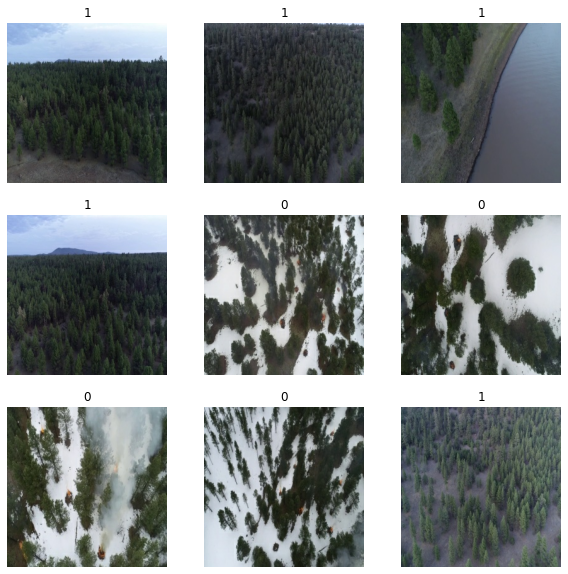

In [8]:
#visualise the Training data set 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):#takes images in tf.Tensor: 1
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1) #plots the 9 pictures in a 3x3
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i])) # title for each image is it's classification
        plt.axis("off")
        print("shape: {0}, min: {1}, max: {2}".format(images[i].numpy().astype("uint8").shape, 
                                                  images[i].numpy().astype("uint8").min(), 
                                                  images[i].numpy().astype("uint8").max()))

In [9]:
train_ds.element_spec

(TensorSpec(shape=(None, 254, 254, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [10]:
#from skimage.color import rgb2gray # Import `rgb2gray` from `skimage.color`
#train_ds_array = np.array(train_ds) # Convert `images28` to an array
#train_ds_gray = rgb2gray(train_ds_array) # Convert `images28` to grayscale

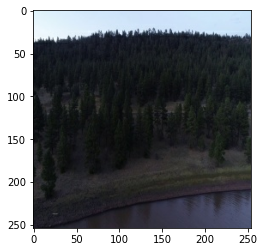

In [16]:
for images, labels in train_ds.take(1): #takes images in tf.Tensor: 1
    for i in range(9): 
        plt.imshow(images[i].numpy().astype("uint8"))


In [30]:
#for array in train_ds:
 #   for i in array:
  #      for j in i:
   #         print(j)


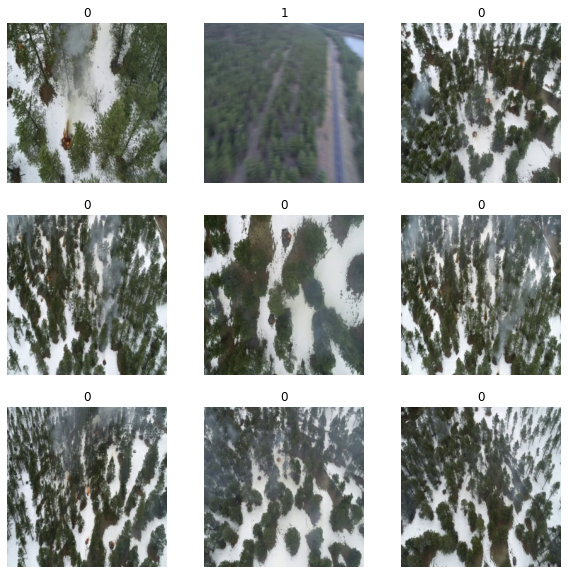

In [33]:
#visualise the validation (test) dataset
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [34]:
train_ds

<BatchDataset shapes: ((None, 254, 254, 3), (None,)), types: (tf.float32, tf.int32)>

In [35]:
#load test images. Returns tf.data.Dataset of images from 
#the subdirectories Fire (class 0) and No_fire (class 1)
Test = tf.keras.preprocessing.image_dataset_from_directory(
    directory = r'C:\Users\User\CE888\Test\Test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(254, 254),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 8617 files belonging to 2 classes.


In [37]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [41]:
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) #standardise dataset
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image))


In [42]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 254, 254, 3)
(32,)


In [43]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(254, 254, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [45]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 254, 254, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

In [46]:
#epochs=10
#history = model.fit(
#  train_ds,
#  validation_data=val_ds,
 # epochs=epochs
#)

In [ ]:
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs_range = range(epochs)

#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc='lower right')
#plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()